In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [3]:
temp = pd.read_csv('https://github.com/wesm/pydata-book/raw/1st-edition/ch02/names/yob1880.txt',names=['name','sex','births'])

In [6]:
temp.sort_values('births',ascending=False)

,name,sex,births
942,John,M,9655
943,William,M,9533
0,Mary,F,7065
944,James,M,5927
945,Charles,M,5348
946,George,M,5126
947,Frank,M,3242
948,Joseph,M,2632
1,Anna,F,2604
949,Thomas,M,2534


In [7]:
'''
for year in range(1880,2011):
    df = pd.read_csv('https://github.com/wesm/pydata-book/raw/1st-edition/ch02/names/yob%d.txt' % year,names=['name','sex','births'])
    df.to_csv('yob%d.txt' % year,header=False,index=False)
'''

columns=['name','sex','births']
raw_data = []

for year in range(1880,2011):
    df = pd.read_csv('yob%d.txt' % year,names=columns)
    df['year'] = year
    raw_data.append(df)
    
names = pd.concat(raw_data,ignore_index=True)

In [8]:
names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1690784 entries, 0 to 1690783
Data columns (total 4 columns):
name      1690784 non-null object
sex       1690784 non-null object
births    1690784 non-null int64
year      1690784 non-null int64
dtypes: int64(2), object(2)
memory usage: 51.6+ MB


In [9]:
names.head(10)

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


In [10]:
name_year = names.pivot_table('births', index='name', columns='year', aggfunc=sum)
name_year.head()

year,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
name,,,,,,,,,,,,,,,,,,,,,
Aaban,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,6.0,9.0
Aabid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aabriella,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN
Aadam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,11.0,10.0,9.0,6.0,9.0,8.0,6.0,9.0,7.0
Aadan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.0,NaN,NaN,NaN,8.0,22.0,23.0,11.0


In [11]:
name_year.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88496 entries, Aaban to Zzyzx
Columns: 131 entries, 1880 to 2010
dtypes: float64(131)
memory usage: 89.1+ MB


In [16]:
name_year[name_year.sum(axis=1)>2000000].head()

year,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
name,,,,,,,,,,,,,,,,,,,,,
Charles,5359.0,4654.0,5115.0,4844.0,4821.0,4623.0,4555.0,4064.0,4619.0,4227.0,...,7295.0,7210.0,7697.0,7696.0,7934.0,8013.0,7452.0,7278.0,7254.0,7035.0
David,869.0,750.0,838.0,742.0,761.0,717.0,674.0,683.0,801.0,757.0,...,19357.0,18677.0,18620.0,18420.0,18099.0,17613.0,17492.0,16268.0,15386.0,14065.0
James,5949.0,5466.0,5910.0,5249.0,5726.0,5201.0,5384.0,4787.0,5607.0,5046.0,...,17100.0,16972.0,16914.0,16526.0,16134.0,16259.0,15941.0,15139.0,14172.0,13741.0
John,9701.0,8795.0,9597.0,8934.0,9427.0,8801.0,9074.0,8165.0,9300.0,8600.0,...,18901.0,17450.0,17236.0,16500.0,15784.0,15175.0,14427.0,13294.0,12059.0,11433.0
Joseph,2642.0,2466.0,2676.0,2533.0,2717.0,2554.0,2602.0,2469.0,3011.0,2736.0,...,22002.0,21907.0,21361.0,20199.0,19213.0,18423.0,17313.0,16513.0,14839.0,13673.0


In [18]:
names_1000 = name_year.sum(axis=1).sort_values(ascending=False)[:1000]
names_1000.head(10)

name
James      5072771.0
John       5061897.0
Robert     4788050.0
Michael    4265373.0
Mary       4119074.0
William    4002392.0
David      3538748.0
Richard    2552269.0
Joseph     2529809.0
Charles    2347703.0
dtype: float64

In [35]:
names_1000.name = 'tcount'
names2 = pd.merge(names,names_1000.to_frame(),left_on='name',right_index=True)

In [49]:
names2.head()

,name,sex,births,year,tcount
0,Mary,F,7065,1880,4119074.0
1273,Mary,M,27,1880,4119074.0
2000,Mary,F,6919,1881,4119074.0
3238,Mary,M,29,1881,4119074.0
3935,Mary,F,8149,1882,4119074.0


In [36]:
names2.name.value_counts()

Marion       262
Jesse        262
Johnnie      262
Francis      262
James        262
Tommie       262
Robert       262
Sidney       262
Jean         262
Jessie       262
Joseph       262
Leslie       262
William      262
Ollie        262
John         262
Lee          262
George       261
June         261
Henry        261
Charles      261
Elizabeth    261
Charlie      261
Frances      260
Anna         260
Thomas       260
Ira          260
Mary         259
Lonnie       259
Dana         258
Alma         258
            ... 
Meghan        78
Karina        77
Caitlin       77
Brittany      76
Mackenzie     75
Brianna       73
Ariana        72
Liam          71
Hailey        68
Carly         67
Kaylee        66
Jaden         66
Latoya        66
Brooklyn      65
Kaitlyn       62
Brittney      61
Kaleb         60
Hayley        58
Katelyn       57
Brayden       55
Makayla       54
Jayden        53
Aiden         52
Arianna       51
Breanna       51
Kaitlin       49
Caitlyn       44
Aaliyah       

In [50]:
name_year_man = names2[names2.sex=='M'].pivot_table('births', index='name', columns='year', aggfunc=sum)
name_year_man.head()

year,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
name,,,,,,,,,,,,,,,,,,,,,
Aaliyah,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.0,8.0,6.0,11.0,10.0,NaN,NaN,NaN,NaN,6.0
Aaron,102.0,94.0,85.0,105.0,97.0,88.0,86.0,78.0,90.0,85.0,...,9529.0,8993.0,8851.0,8381.0,7796.0,8279.0,8914.0,8511.0,7936.0,7374.0
Abby,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,20.0,NaN,6.0,8.0,5.0,5.0,NaN
Abigail,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,19.0,20.0,23.0,89.0,13.0,15.0,27.0,20.0,16.0,9.0
Abraham,81.0,86.0,91.0,52.0,67.0,86.0,77.0,75.0,78.0,83.0,...,1816.0,1793.0,1894.0,1984.0,2042.0,2200.0,2139.0,2143.0,2088.0,1899.0


In [51]:
mary = name_year_man.loc['Mary']
mary[mary.isnull()]

year
2008   NaN
2009   NaN
2010   NaN
Name: Mary, dtype: float64

In [55]:
mary = names[(names.name=='Mary')]
mary_year_sex = mary.pivot_table('births', index='year', columns='sex', aggfunc=sum)
mary_year_sex[mary_year_sex.M.isnull()]

sex,F,M
year,,
2008,3478.0,NaN
2009,3132.0,NaN
2010,2826.0,NaN


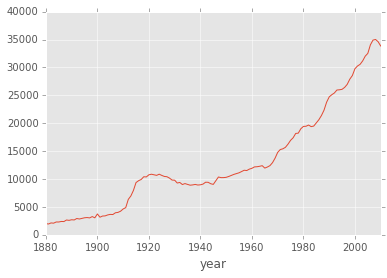

In [5]:
names.groupby('year').size().plot()

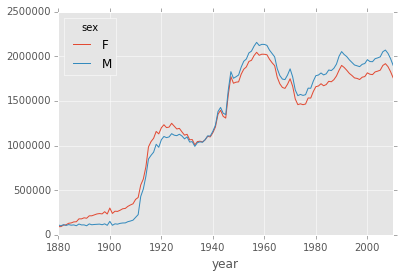

In [6]:
#total_births = names.groupby(['year','sex']).births.sum().unstack()
total_births = names.pivot_table('births',index='year',columns='sex',aggfunc='sum')
total_births.tail()
total_births.plot()

In [19]:
def myf(g):
    g['prop']=g.births / g.births.sum()
    return g
names = names.groupby(['year','sex']).apply(myf)
names.head()

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


In [20]:
def get_top1000(g):
    return g.sort_values('births',ascending=False)[:1000]
top1000 = names.groupby(['year','sex']).apply(get_top1000).reset_index(drop=True)
top1000.head()

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


In [21]:
top1000.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261877 entries, 0 to 261876
Data columns (total 5 columns):
name      261877 non-null object
sex       261877 non-null object
births    261877 non-null int64
year      261877 non-null int64
prop      261877 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 10.0+ MB


In [10]:
top1000.groupby(['year','sex']).size().head(10)

year  sex
1880  F       942
      M      1000
1881  F       938
      M       997
1882  F      1000
      M      1000
1883  F      1000
      M      1000
1884  F      1000
      M      1000
dtype: int64

In [11]:
boys = top1000[top1000.sex=='M']
girs = top1000[top1000.sex=='F']

In [12]:
pv_year_name = top1000.pivot_table('births',index='year',columns='name',aggfunc='sum')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0A656CD0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0B686DD0>], dtype=object)

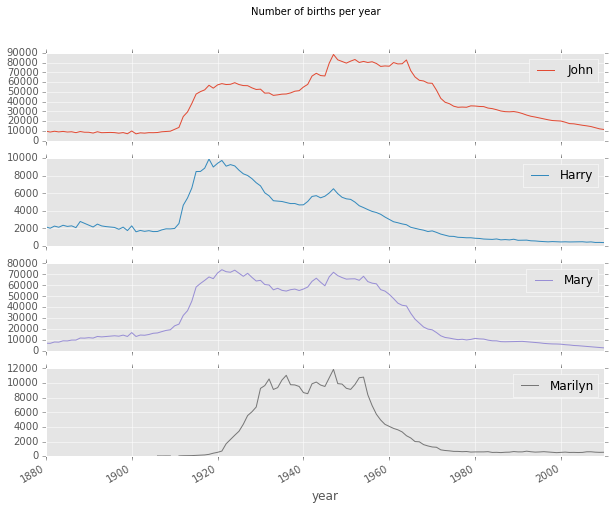

In [13]:
subset = pv_year_name[['John','Harry','Mary','Marilyn']]
subset.plot(subplots=True,figsize=[10,8],title='Number of births per year')

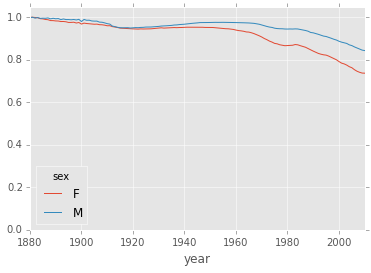

In [14]:
df = top1000.pivot_table('prop',index='year',columns='sex',aggfunc='sum')
df.plot(yticks=np.arange(0,1.2,0.2))

(116, 24)

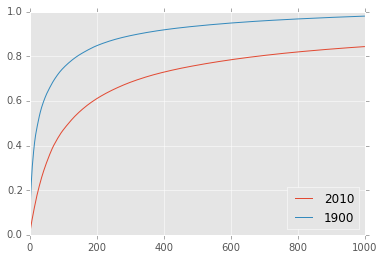

In [15]:
boys2010 = boys[boys.year==2010]
df = boys2010.sort_values('prop',ascending=False).prop.cumsum()

boys1900 = boys[boys.year==1900]
df2 = boys1900.sort_values('prop',ascending=False).prop.cumsum()

plt.plot(df)
plt.plot(df2)
plt.legend(['2010','1900'],loc='lower right')
df.searchsorted(0.5)[0], df2.searchsorted(0.5)[0]

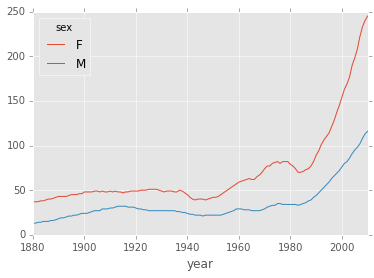

In [16]:
top1000.head()
def myf(g):
    g2 = g.sort_values('prop',ascending=False).prop.cumsum()
    return g2.searchsorted(0.5)[0]
df = top1000.groupby(['year','sex']).apply(myf)
df = df.unstack('sex')
df.plot()

In [17]:
print(len(names))
names.head()

1690784


,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


In [18]:
last_letters = names.name.map(lambda s: s[-1])
df=names.pivot_table('births',index=last_letters,columns=['sex','year'],aggfunc=sum)
df.head()

sex         F                                                                 \
year     1880     1881     1882     1883     1884     1885     1886     1887   
name                                                                           
a     31446.0  31581.0  36536.0  38330.0  43680.0  45408.0  49100.0  48942.0   
b         NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
c         NaN      NaN      5.0      5.0      NaN      NaN      NaN      NaN   
d       609.0    607.0    734.0    810.0    916.0    862.0   1007.0   1027.0   
e     33378.0  34080.0  40399.0  41914.0  48089.0  49616.0  53884.0  54353.0   

sex                       ...            M                                \
year     1888     1889    ...         2001      2002      2003      2004   
name                      ...                                              
a     59442.0  58631.0    ...      39124.0   38815.0   37825.0   38650.0   
b         NaN      NaN    ...      50950.0   49284.0   48065.0   45914.0   
c         NaN      NaN    ...      27113.0   27238.0   27697.0   26778.0   
d      1298.0   1374.0    ...      60838.0   55829.0   53391.0   51754.0   
e     66750.0  66663.0    ...     145395.0  144651.0  144769.0  142098.0   

sex                                                               
year      2005      2006      2007      2008      2009      2010  
name                                                              
a      36838.0   36156.0   34654.0   32901.0   31430.0   28438.0  
b      43144.0   42600.0   42123.0   39945.0   38862.0   38859.0  
c      26078.0   26635.0   26864.0   25318.0   24048.0   23125.0  
d      50670.0   51410.0   50595.0   47910.0   46172.0   44398.0  
e     141123.0  142999.0  143698.0  140966.0  135496.0  129012.0  

[5 rows x 262 columns]

sex          F                             M                    
year      1910      1960      2010      1910      1960      2010
name                                                            
a     0.273390  0.341853  0.381240  0.005031  0.002440  0.014980
b          NaN  0.000343  0.000256  0.002116  0.001834  0.020470
c     0.000013  0.000024  0.000538  0.002482  0.007257  0.012181
d     0.017028  0.001844  0.001482  0.113858  0.122908  0.023387
e     0.336941  0.215133  0.178415  0.147556  0.083853  0.067959

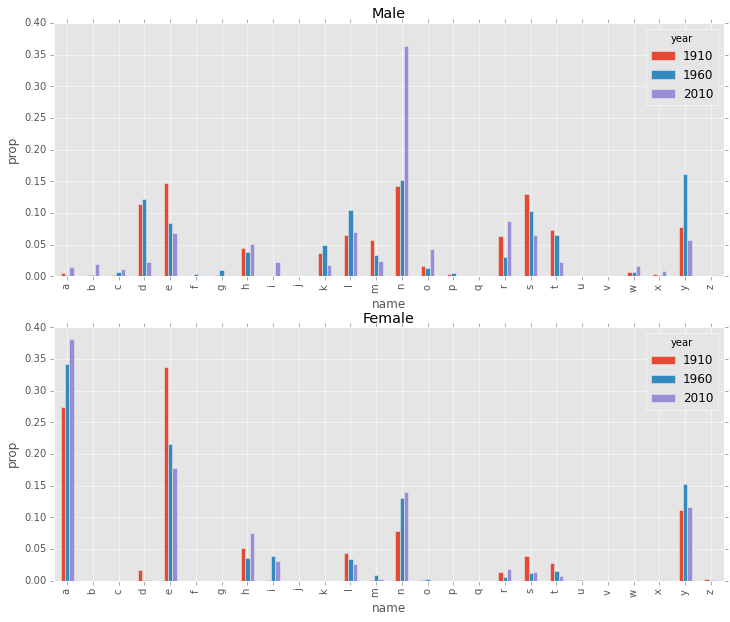

In [19]:
df2 = df.reindex(columns=[1910,1960,2010],level='year')
letter_prop = df2 / df2.sum()
display(letter_prop.head())

fig, axes = plt.subplots(2,1,figsize=[12,10])
letter_prop['M'].plot(kind='bar', ax=axes[0], title='Male'); axes[0].set_ylabel('prop')
letter_prop['F'].plot(kind='bar', ax=axes[1], title='Female'); axes[1].set_ylabel('prop')

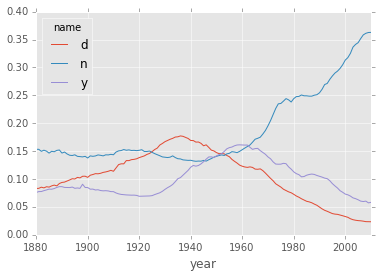

In [25]:
letter_prop = df / df.sum()
dny_ts = letter_prop.loc[['d','n','y'],'M'].T
dny_ts.plot()

In [27]:
display(top1000.head())
top1000.info()

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261877 entries, 0 to 261876
Data columns (total 5 columns):
name      261877 non-null object
sex       261877 non-null object
births    261877 non-null int64
year      261877 non-null int64
prop      261877 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 8.0+ MB


In [36]:
all_names = top1000.name.unique() # 6868, list
lesley_like = all_names[['lesl' in name.lower() for name in all_names]]
filtered = top1000[top1000.name.isin(lesley_like)]
filtered.head()

,name,sex,births,year,prop
632,Leslie,F,8,1880,0.000088
1108,Leslie,M,79,1880,0.000715
2462,Leslie,F,11,1881,0.000120
3014,Leslie,M,92,1881,0.000913
4512,Leslie,F,9,1882,0.000083


sex,F,M
year,,
1880,8.0,79.0
1881,11.0,92.0
1882,9.0,128.0
1883,7.0,125.0
1884,15.0,125.0


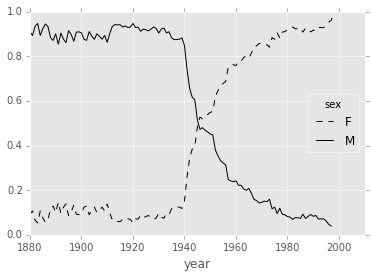

In [46]:
table = filtered.pivot_table('births',index='year',columns='sex',aggfunc='sum')
display(table.head())
table = table.div(table.sum(1),axis=0) # table.sum(1) 이 table 의 axis=0 과 일치한다
table.plot(style={'M': 'k-', 'F': 'k--'})